# Logistic Regression - Class Exercise 1

## Introduction

During the university admission season, the admission team needs to review thousands of applications and only a small portion will stand out eventually to receive the offers. It is a very tedious and label-intensive process. The admission team would like to make use of the historical data to develop a model to perform a preliminary screening of the applications.

We will use the "admission" dataset for this exercise. This dataset contains 8 features. Our goal is to build a linear regression model to predict whether the candidate will be admitted.

## Metadata (Data Dictionary)

| Variable | Data Type | Description |
|----------|-----------|-------------|
| Serial No. | int | Unique Identifier |
| GRE Score | int | GRE Score (0 to 340) |
| TOEFL Score | int | TOEFL Score (0 to 120) |
| University Rating | int | University Rating (1 to 5) |
| SOP | float | Statement of Purpose (1 to 5) |
| LOR | float | Letter of Recommendation (1 to 5) |
| CGPA | float | Undergraduate Cumulative GPA (0 to 10) |
| Research | int | Whether the candidate has research experience (0: No, 1: Yes) |
| Chance of Admit | float | Chance of Admit (0 to 1) |


# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Import Data

<font color=red><b>Action</b>: Load the data file and check against the metadata.

In [2]:
df = pd.read_csv('Admission.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


# Exploratory Analysis

<font color=red><b>Action</b>: Display the basic numeric summary for "Chance of Admit".

In [3]:
df['Chance of Admit'].describe()

count    500.00000
mean       0.72174
std        0.14114
min        0.34000
25%        0.63000
50%        0.72000
75%        0.82000
max        0.97000
Name: Chance of Admit, dtype: float64

There are about 25% of the samples above 0.82.<br>
Let's assume that samples with "Chance of Admit" > 0.8 will be admitted.

### Create a categorical label from the existing numeric label
0: Not admitted, 1: Admitted

In [4]:
cutoff = 0.8

We can check the proportion of each class.

<font color=red><b>Action</b>: Create a column called "Admit", it takes 1, if "Chance of Admit" is greater than the cutoff, or 0 otherwise

In [5]:
df['Admit'] = (df['Chance of Admit'] > cutoff).astype('int')
df['Admit'].value_counts()

Admit
0    358
1    142
Name: count, dtype: int64

### Visualize the distribution of each class per 2 features
we can change the feature on the x-axis and on the y-axis to make up any combination.

<font color=red><b>Action 1</b>: Create a scatter plot between any 2 features<br>
<b>Action 2</b>: Plot the positive samples in green and the negative samples in red

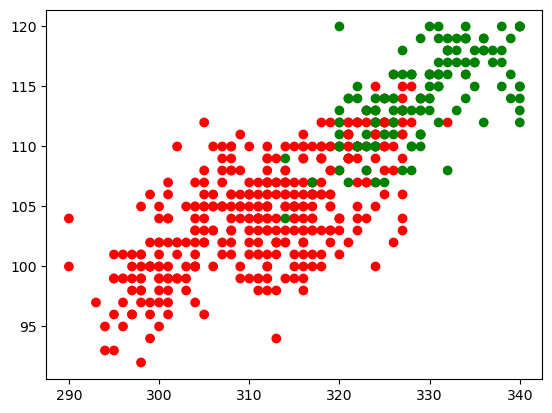

In [6]:
x = df['GRE Score']
y = df['TOEFL Score']
color = df['Admit'].map({0: 'red', 1: 'green'})

plt.scatter(x, y, color=color)

### Extract the features and the label
We are using "Admit" as the categorical label for classification.
Take note that, "Chance of Admit" should be excluded as it is the equivalent numeric label.

<font color=red><b>Action 1</b>: Create a string variable to be the column name of the label<br>
<b>Action 2</b>: Create a list that contains the names of columns to be used as input features

In [7]:
label = 'Admit'
excluded_features = [label, 'Serial No.', 'Chance of Admit']
features = [feature for feature in list(df) if feature not in excluded_features]
print(features)

['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']


<font color=red><b>Action</b>: Split the full DataFrame into the training set and the test set.</font>

In [8]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=0)
display(train_df.head())
display(test_df.head())

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admit
107,108,338,117,4,3.5,4.5,9.46,1,0.91,1
336,337,319,110,3,3.0,2.5,8.79,0,0.72,0
71,72,336,112,5,5.0,5.0,9.76,1,0.96,1
474,475,308,105,4,3.0,2.5,7.95,1,0.67,0
6,7,321,109,3,3.0,4.0,8.20,1,0.75,0


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admit
90,91,318,106,2,4.0,4.0,7.92,1,0.64,0
254,255,321,114,4,4.0,5.0,9.12,0,0.85,1
283,284,321,111,3,2.5,3.0,8.90,1,0.80,0
445,446,328,116,5,4.5,5.0,9.08,1,0.91,1
461,462,301,102,3,2.5,2.0,8.13,1,0.68,0


<font color=red><b>Action</b>: Extract the features and the label for the training set and the test set, respectively.

In [9]:
train_x = train_df[features]
train_y = train_df[label]

test_x = test_df[features]
test_y = test_df[label]

<font color=red><b>Action</b>: Display the proportion of each class in the training/test set

In [10]:
display(train_y.value_counts())
display(test_y.value_counts())

Admit
0    280
1    120
Name: count, dtype: int64

Admit
0    78
1    22
Name: count, dtype: int64

<font color=red><b>Action</b>: Display the proportion (in %) of each class in the training/test set

In [11]:
display(train_y.value_counts() / train_y.shape[0])
display(test_y.value_counts() / test_y.shape[0])

Admit
0    0.7
1    0.3
Name: count, dtype: float64

Admit
0    0.78
1    0.22
Name: count, dtype: float64

### Build a logistic regression model

In [12]:
from sklearn.linear_model import LogisticRegression

<font color=red><b>Action 1</b>: Initialize a logistic regression model<br>
<b>Action 2</b>: Train the model by the training features and the train label<br>
<b>Action 3</b>: Predict the training label and the test label.<br>

In [13]:
model = LogisticRegression(max_iter=1000)
model.fit(train_x, train_y)

train_yhat = model.predict(train_x)
test_yhat = model.predict(test_x)

### Generate a confusion matrix

<font color=red><b>Action</b>: Construct a confusion matrix for the training prediction

In [ ]:
metrics.confusion_matrix(train_y, train_yhat)

<font color=red><b>Action</b>: Construct a confusion matrix for the test prediction

In [14]:
metrics.confusion_matrix(test_y, test_yhat)

array([[76,  2],
       [ 1, 21]], dtype=int64)

The confusion matrix looks great as we have much more true positive and true negative than false positive and false negative.

### Practice: Let's write a custom function to determine the classification metrics

<font color=red><b>Action</b>: Complete the following cell

In [15]:
def get_classification_metrics(y, yhat):
    # Record the total number of samples
    n = len(y)
    
    # Count the number of correct samples and calculate the accuracy
    n_correct = (y == yhat).sum()
    accuracy = n_correct / n
    
    # One way to calculate the error rate
    error_rate = 1 - accuracy
    
    # The other way to calculate the error rate
    n_incorrect = (y != yhat).sum()
    error_rate = n_incorrect / n
    
    # Count the number of true positive
    TP = ((y == 1) & (yhat == 1)).sum()
    
    # Count the number of false positive
    FP = ((y == 0) & (yhat == 1)).sum()
    
    # Count the number of true negative
    TN = ((y == 0) & (yhat == 0)).sum()
    
    # Count the number of false negative
    FN = ((y == 1) & (yhat == 0)).sum()
    
    # Calculate sensitivity / specificity / precision / recall
    sensitivity = recall = TP / (TP + FN)
    specificity = TN / (FP + TN)
    precision = TP / (TP + FP)
    
    item = ['Accuracy', 'Error Rate', 'Sensitivity', 'Specificity', 'Precision', 'Recall']
    value = accuracy, error_rate, sensitivity, specificity, precision, recall
    
    df_out = {'Item': item, 'Value': value}
    df_out = pd.DataFrame(df_out)
    return df_out

<font color=red><b>Action</b>: Run the function above

In [16]:
get_classification_metrics(test_y, test_yhat)

,Item,Value
0,Accuracy,0.970000
1,Error Rate,0.030000
2,Sensitivity,0.954545
3,Specificity,0.974359
4,Precision,0.913043
5,Recall,0.954545


# Solve it as a regression problem
In this dataset, there are numeric labels (Chance of Admit) and categorical labels (Admit).<br>
Hence, it can be solved as a regression problem, too.

In classification, we are predicting the categorical labels directly.<br>
If we are taking it as a regression problem, we will first predict the numeric labels, then convert it to the equivalent categorical labels.

### Get the features and the label again
This time, we are taking the numeric labels to train the model, so we have to exclude the categorical labels.

<font color=red><b>Action 1</b>: Create a string variable to be the column name of the label<br>
<b>Action 2</b>: Create a list that contains the names of columns to be used as input features

In [17]:
label = 'Chance of Admit'
excluded_features = [label, 'Serial No.', 'Admit']
features = [feature for feature in list(df) if feature not in excluded_features]

<font color=red><b>Action</b>: Split the full DataFrame into the training set and the test set.</font>

In [18]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=0)
display(train_df.head())
display(test_df.head())

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admit
107,108,338,117,4,3.5,4.5,9.46,1,0.91,1
336,337,319,110,3,3.0,2.5,8.79,0,0.72,0
71,72,336,112,5,5.0,5.0,9.76,1,0.96,1
474,475,308,105,4,3.0,2.5,7.95,1,0.67,0
6,7,321,109,3,3.0,4.0,8.20,1,0.75,0


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admit
90,91,318,106,2,4.0,4.0,7.92,1,0.64,0
254,255,321,114,4,4.0,5.0,9.12,0,0.85,1
283,284,321,111,3,2.5,3.0,8.90,1,0.80,0
445,446,328,116,5,4.5,5.0,9.08,1,0.91,1
461,462,301,102,3,2.5,2.0,8.13,1,0.68,0


<font color=red><b>Action</b>: Extract the features and the label for the training set and the test set, respectively.

In [19]:
train_x = train_df[features]
train_y = train_df[label]

test_x = test_df[features]
test_y = test_df[label]

### Build the regression model

<font color=red><b>Action 1</b>: Initialize a linear regression model<br>
<b>Action 2</b>: Train the model by the training features and the train label<br>
<b>Action 3</b>: Predict the training label and the test label<br>

In [20]:
model = LinearRegression()
model.fit(train_x, train_y)

train_yhat = model.predict(train_x)
test_yhat = model.predict(test_x)

### Convert the prediction to categories

<font color=red><b>Action</b>: Extract the actual categorical label

In [21]:
test_y_cat = test_df['Admit']

<font color=red><b>Action</b>: Convert the predicted numeric label to the predicted categorical label

In [22]:
test_yhat_cat = (test_yhat > 0.8).astype('int')

### Construct the confusion matrix

<font color=red><b>Action</b>: Construct a confusion matrix for the test prediction

In [23]:
metrics.confusion_matrix(test_y_cat, test_yhat_cat)

array([[74,  4],
       [ 1, 21]], dtype=int64)

### Get the classification metrics

<font color=red><b>Action</b>: Determine the classification metrics

In [24]:
get_classification_metrics(test_y_cat, test_yhat_cat)

,Item,Value
0,Accuracy,0.950000
1,Error Rate,0.050000
2,Sensitivity,0.954545
3,Specificity,0.948718
4,Precision,0.840000
5,Recall,0.954545


We can see that, the linear regression model and the logistic regression model perform almost the same.